# Bayesian Coin Tossing
### Signor Theosamuele

Simulating coin tossing for parameter estimation with different priors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
sns.set_style("darkgrid")
sns.set_context("paper",rc={"lines.linewidth": 2})

In [3]:
def simulation(N,H_value):
    outcomes = []
    for i in range(N):
        res = np.random.binomial(1,H_value)
        outcomes.append(res)
    return outcomes

In [15]:
def plot_posterior_pdf():
    tosses = [0, 1, 2, 3, 4, 6, 8,10,50,100,500,1000]
    fig = plt.figure(figsize = (25,30))
    
    H = np.linspace(0.000001,0.999999,5000)
    
    H_value = float(input("H value for coin tossing simulation in (0,1): "))
    mu = float(input("Gaussian mean value: "))
    sigma = float(input("Gaussian std value: "))
    alpha = float(input("Beta shape1 value: "))
    beta = float(input("Beta shape2 value: "))
    outcomes= simulation(N =1000,H_value=H_value)
   
    for i, n in enumerate(tosses):
        outcome = outcomes[0:n]                                  #outcome of tosses
        R = outcome.count(1)                                     #total number of heads
        p_unif = (H**R)*((1-H)**(n - R))*1                       #uniform prioir
        p_normal = (H**R)*((1-H)**(n - R))*norm.pdf(H,mu,sigma)  #normal prioir
        p_beta=H**(R+alpha-1)*(1-H)**(n-R+beta-1)                #beta prior
            
        #normalization, use trapezoid integration method for convenience
        p_unif/= np.trapz(y=p_unif,x=H)
        p_normal/= np.trapz(y=p_normal,x=H)
        p_beta /= np.trapz(y=p_beta,x=H)
    
        #plot the pdf
        ax = plt.subplot(4, 3, i+1)
        ax.plot(H, p_beta, 'royalblue', label = 'Beta Prior')
        ax.plot(H, p_normal, 'lime', label = 'Gaussian Prior')
        ax.plot(H, p_unif,color='hotpink',label='Uniform Prior')
       
        ax.set_title('N = '+str(n),fontsize=20)
        ax.set_xticks(np.arange(0, 1.1, 0.1))
        ax.legend(loc='upper right',fontsize=15)
        ax.set_xlabel('H',fontsize=15)
        
    plt.show()

H value for coin tossing simulation in (0,1): 0.2
Gaussian mean value: 0.5
Gaussian std value: 0.1
Beta shape1 value: 10
Beta shape2 value: 8


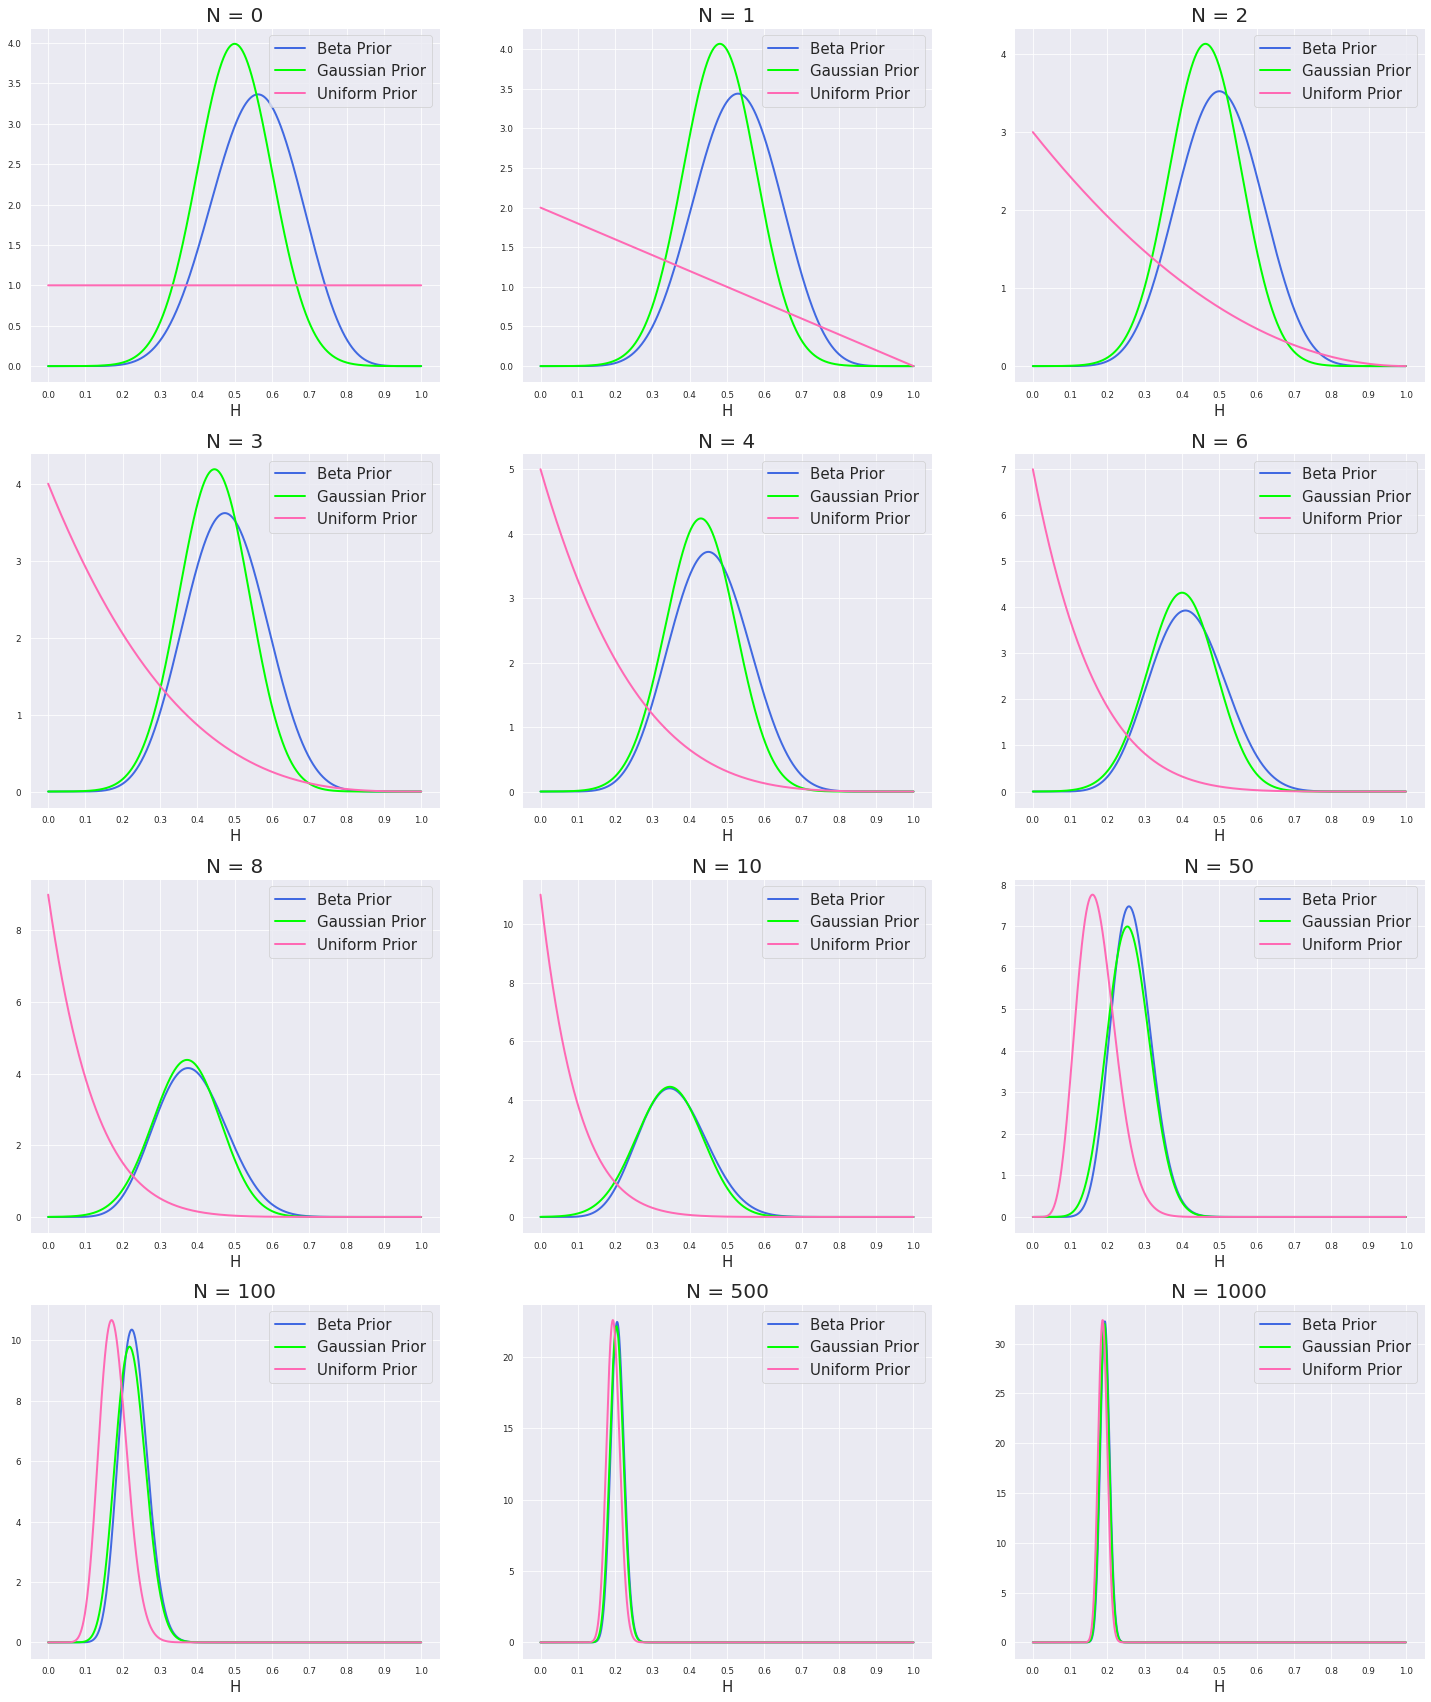

In [16]:
plot_posterior_pdf()